In [1]:
'''
Import the helper functions: map_tuple, mean
'''
%run ./lib/helper.py
%run ./lib/graph.py
%run ./lib/graph_edge_factory.py
%run ./lib/plot.py
%run ./lib/routing_simulation.py
%run ./lib/routing_algorithms.py
%run ./lib/logger.py

# Run initial knowledge for k=4 power law

In [2]:
samples = 1000
max_th = 4
start = time.time()
for rounds in range(2):
    initial_knowledge_results = []
    for dth in range(1, max_th + 1):
        threshold = 2 ** dth
        factory = graph_edge_factory.GraphEdgesFactory(distance_threshold=threshold, max_threshold=2 ** max_th)
        graph_edges = factory.generate_random_power_law_graph_edges(number_of_links=4)
        arguments = {'algorithm': routing_algorithms.initial_knowledge_init, 'graph_edges': graph_edges,
                     'link_prediction': False, 'exponential_scale': True}
        local_result, length = routing_simulation.run_algorithm_for_graphs(60, samples, arguments)
        initial_knowledge_results.append(local_result)
    end = time.time()
    write_results_to_file(initial_knowledge_results, 'initial_knowledge_power_k4_proc1_round_' + str(rounds) + '_dth_' + str(threshold), '' , (end - start))

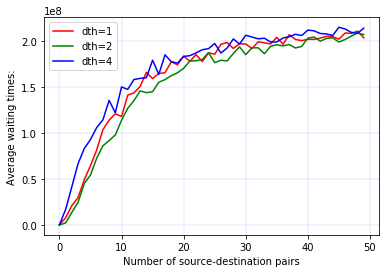

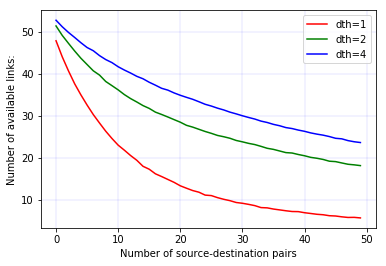

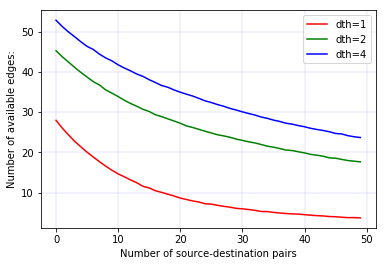

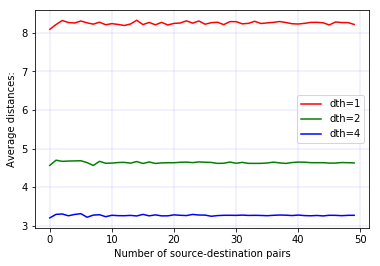

In [8]:
plot_results(initial_knowledge_results, 'poly', topology_names=['dth=1','dth=2','dth=4','dth=8','dth=16'], save_tikz=False)